Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Temperatura Mínima Diária da Cidade de Melbourn Austrália - TDNN (rede neural com retardo de tempo)

In [ ]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Experimento 1**
p = 05,
N1 = 15,
solver='sgd'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas
print(df.head(15))

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

print(dfNew)

    Amostra    f(t)
0         1  0.1701
1         2  0.1023
2         3  0.4405
3         4  0.3609
4         5  0.7192
5         6  0.2258
6         7  0.3175
7         8  0.0127
8         9  0.4290
9        10  0.0544
10       11  0.8000
11       12  0.0450
12       13  0.4268
13       14  0.0112
14       15  0.3218


<ipython-input-2-da535c9a7801>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


        x-5     x-4     x-3     x-2     x-1       x
0    0.1701  0.1023  0.4405  0.3609  0.7192  0.2258
1    0.1023  0.4405  0.3609  0.7192  0.2258  0.3175
2    0.4405  0.3609  0.7192  0.2258  0.3175  0.0127
3    0.3609  0.7192  0.2258  0.3175  0.0127  0.4290
4    0.7192  0.2258  0.3175  0.0127  0.4290  0.0544
..      ...     ...     ...     ...     ...     ...
110  0.5438  0.5897  0.3536  0.2210  0.0631  0.4499
111  0.5897  0.3536  0.2210  0.0631  0.4499  0.2564
112  0.3536  0.2210  0.0631  0.4499  0.2564  0.7642
113  0.2210  0.0631  0.4499  0.2564  0.7642  0.1411
114  0.0631  0.4499  0.2564  0.7642  0.1411  0.3626

[115 rows x 6 columns]


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='sgd', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001, learning_rate = 'constant')

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, solver='sgd', tol=1e-06)

Avaliação do Modelo

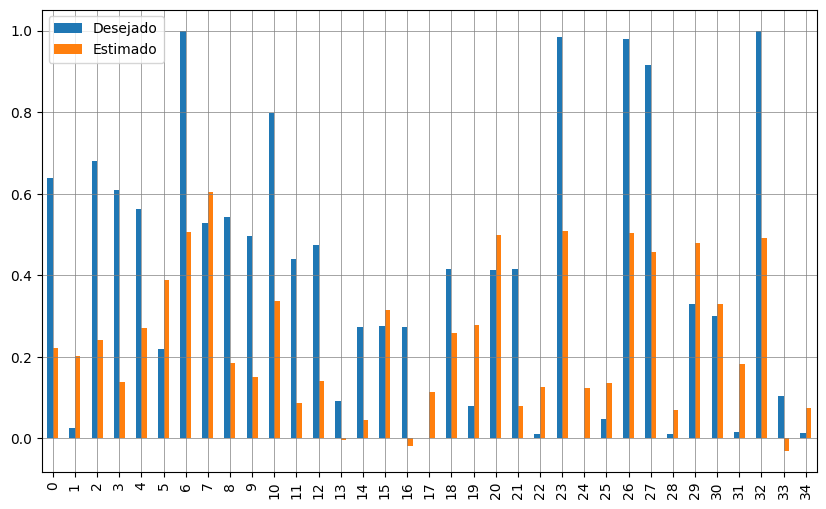

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

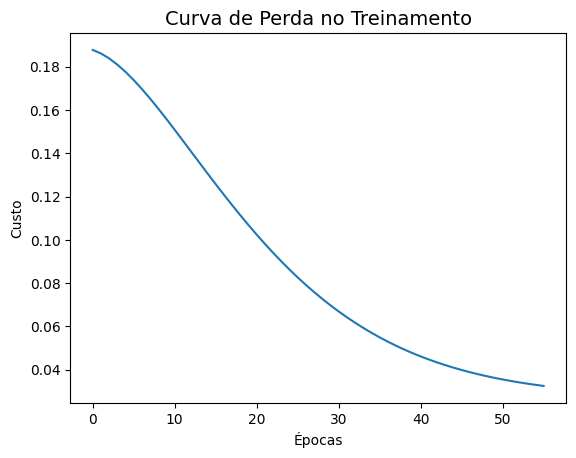

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  56
Loss:  0.03244334142636839
Mean Absolute Error (MAE):  0.2507349129440932
Mean Squared Error (MSE):  0.08737473329354632
Root Mean Squared Error (RMSE):  0.2955921739382596
R2 Score:  0.16186268345534083


# **Experimento 2**
p = 05,
N1 = 15,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

<ipython-input-8-a77d2eee2686>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

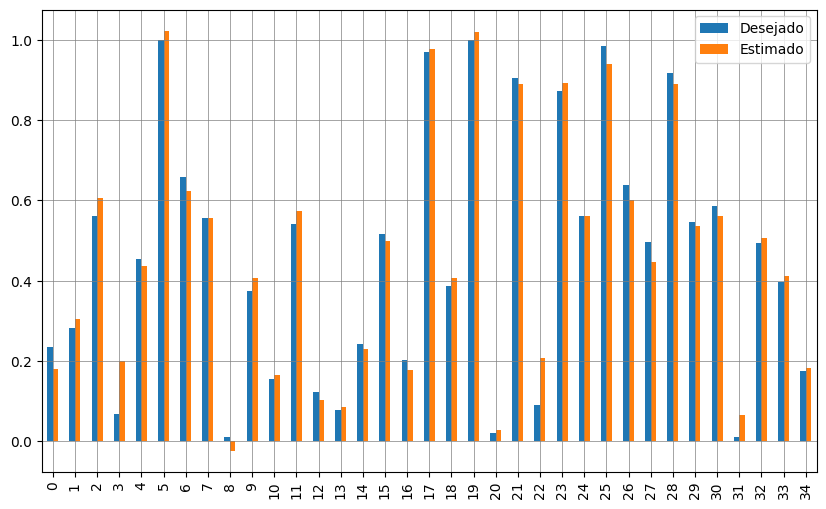

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

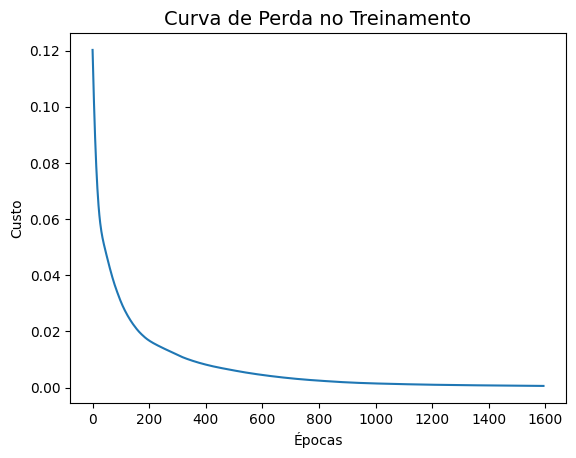

In [ ]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  1594
Loss:  0.0006166823252531953
Mean Absolute Error (MAE):  0.028925838721411433
Mean Squared Error (MSE):  0.001605206130881467
Root Mean Squared Error (RMSE):  0.04006502378486087
R2 Score:  0.9833120634348677


# **Rede 1: T1**
p = 05,
N1 = 15,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-14-73c523c38cf4>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg1 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg1.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[0.56777017 0.45212066 0.39559831 0.62358435 0.46864762 0.25841266
 0.37257195 0.33691121 0.40634582 0.49617337 0.37575336 0.3531993
 0.23654346 0.3673245  0.38731366 0.40039588 0.35310157 0.49250619
 0.20617138 0.49207887]


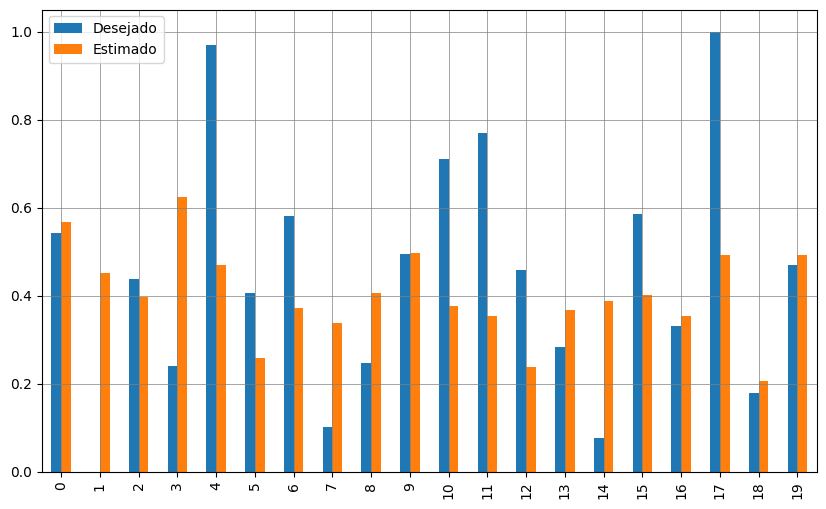

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg1.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

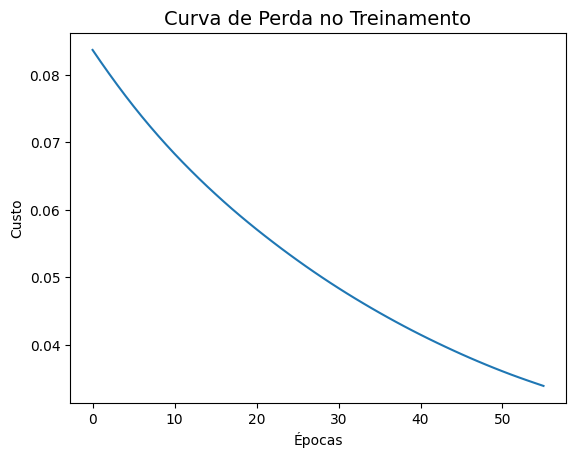

In [ ]:
plt.plot(mlp_reg1.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg1.n_iter_)
print('Loss: ', mlp_reg1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  56
Loss:  0.03391502755481428
Mean Absolute Error (MAE):  0.21458655995489626
Mean Squared Error (MSE):  0.07416767372027515
Root Mean Squared Error (RMSE):  0.27233742622025925
R2 Score:  -0.018614692475240613


# **Rede 1: T2**
p = 05,
N1 = 15,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-20-73c523c38cf4>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg2 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg2.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.5144364  -0.01286668  0.52099258  0.28437665  0.8915578   0.32575893
  0.56598999  0.09036633  0.22749821  0.40608246  0.68326383  0.69649809
  0.40897267  0.28137297  0.09961372  0.577716    0.27085517  0.95439193
  0.22933376  0.42283563]


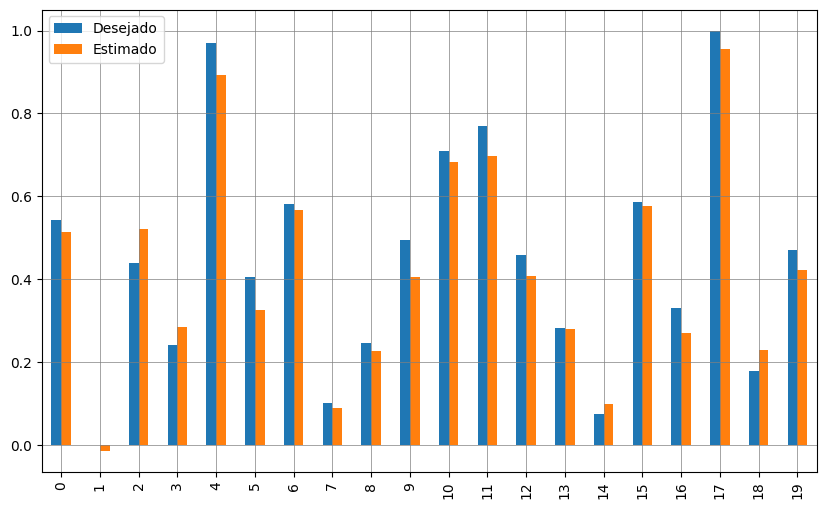

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg2.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

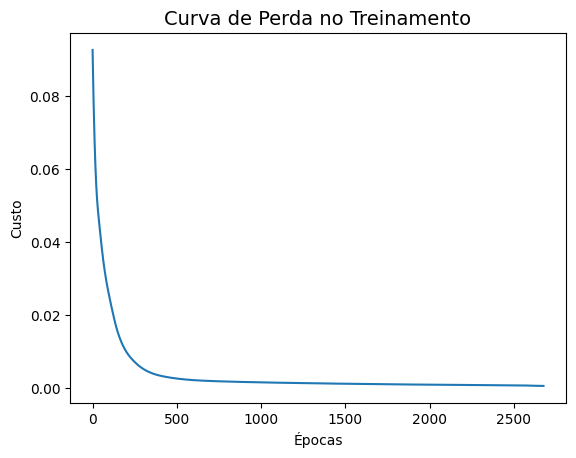

In [ ]:
plt.plot(mlp_reg2.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg2.n_iter_)
print('Loss: ', mlp_reg2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  2677
Loss:  0.0005198351091340208
Mean Absolute Error (MAE):  0.042284098078319766
Mean Squared Error (MSE):  0.0025170798899169407
Root Mean Squared Error (RMSE):  0.050170508168813084
R2 Score:  0.9654305652396045


# **Rede 1: T3**
p = 05,
N1 = 15,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-26-73c523c38cf4>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg3 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg3.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.52743454 -0.02870387  0.57370422  0.20956708  0.825382    0.35597953
  0.55643515  0.05954174  0.22483536  0.46092906  0.68271029  0.75562042
  0.48076507  0.23508481  0.11059606  0.58656148  0.26041017  0.9772941
  0.15232404  0.45489296]


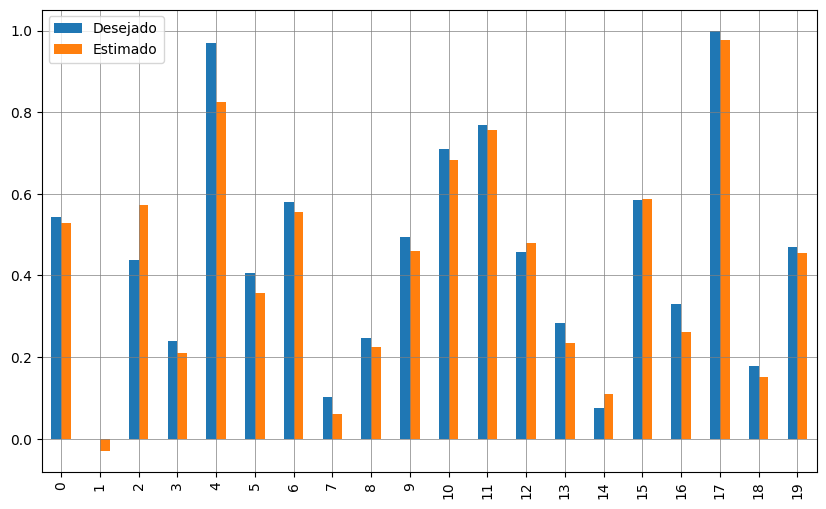

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg3.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

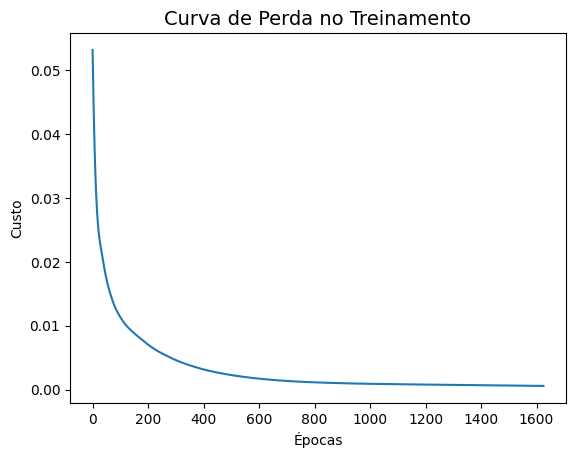

In [ ]:
plt.plot(mlp_reg3.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg3.n_iter_)
print('Loss: ', mlp_reg3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  1626
Loss:  0.0005903577667249138
Mean Absolute Error (MAE):  0.04039262535921162
Mean Squared Error (MSE):  0.002950552683063756
Root Mean Squared Error (RMSE):  0.054318990077722874
R2 Score:  0.9594772740853893


# **Rede 2: T1**
p = 10,
N1 = 25,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-10): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-10': [dados[i]], 'x-9': [dados[i+1]], 'x-8': [dados[i+2]], 'x-7': [dados[i+3]],
                             'x-6': [dados[i+4]], 'x-5': [dados[i+5]], 'x-4': [dados[i+6]], 'x-3': [dados[i+7]],
                             'x-2': [dados[i+8]], 'x-1': [dados[i+9]],'x': [dados[i+10]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-32-94fa90742373>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg1 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg1.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.52642089 -0.02962094  0.45981734  0.20391132  0.94248208  0.34331655
  0.56537476  0.09232273  0.24791921  0.57808884  0.64515619  0.7483549
  0.41952262  0.24657675  0.08479224  0.55031412  0.30155859  0.94423854
  0.18332584  0.44208766]


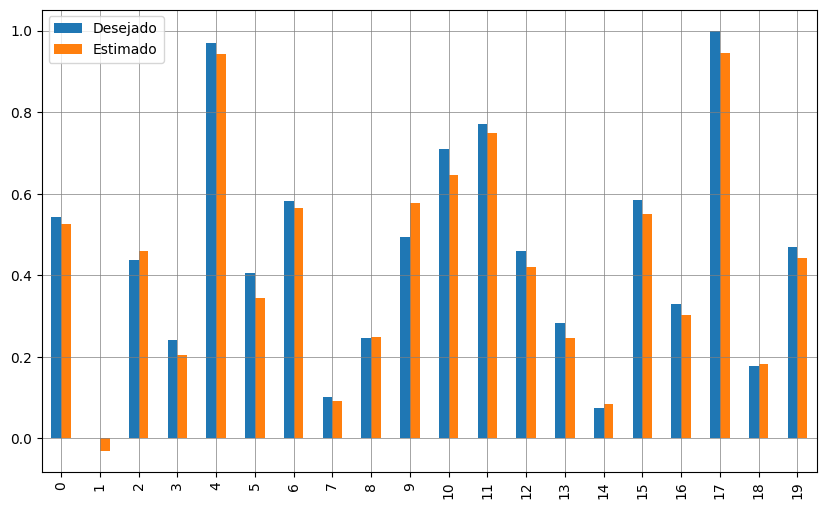

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg1.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

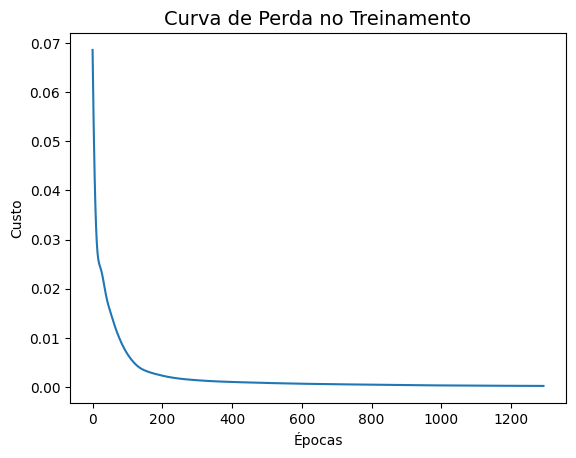

In [ ]:
plt.plot(mlp_reg1.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg1.n_iter_)
print('Loss: ', mlp_reg1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  1294
Loss:  0.00025275067347005456
Mean Absolute Error (MAE):  0.031414278605331095
Mean Squared Error (MSE):  0.0014251049957947127
Root Mean Squared Error (RMSE):  0.03775056285401203
R2 Score:  0.9804276875055942


# **Rede 2: T2**
p = 10,
N1 = 25,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-10): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-10': [dados[i]], 'x-9': [dados[i+1]], 'x-8': [dados[i+2]], 'x-7': [dados[i+3]],
                             'x-6': [dados[i+4]], 'x-5': [dados[i+5]], 'x-4': [dados[i+6]], 'x-3': [dados[i+7]],
                             'x-2': [dados[i+8]], 'x-1': [dados[i+9]],'x': [dados[i+10]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-38-94fa90742373>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg2 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg2.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.52623746 -0.00304946  0.44552288  0.21668195  0.95046789  0.35587118
  0.59197527  0.12437579  0.26056379  0.49789733  0.67042287  0.74000376
  0.43038466  0.25496324  0.08787184  0.55026638  0.29566722  0.98738939
  0.15946094  0.48485725]


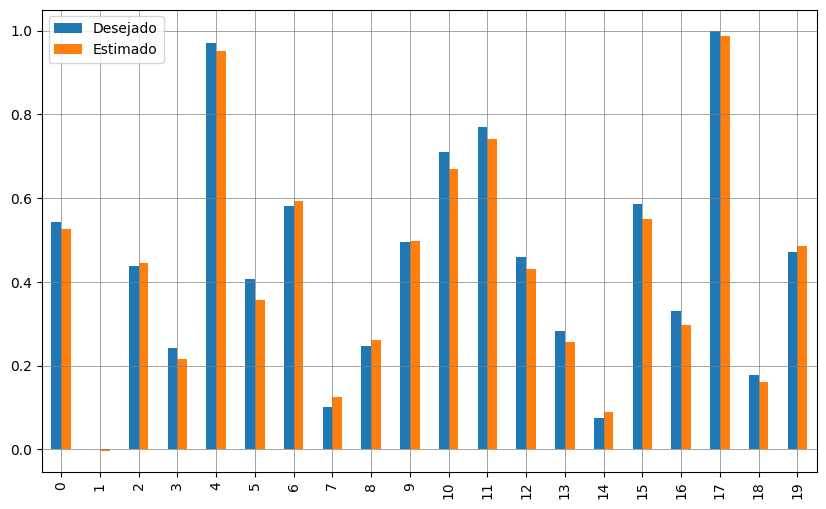

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg2.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

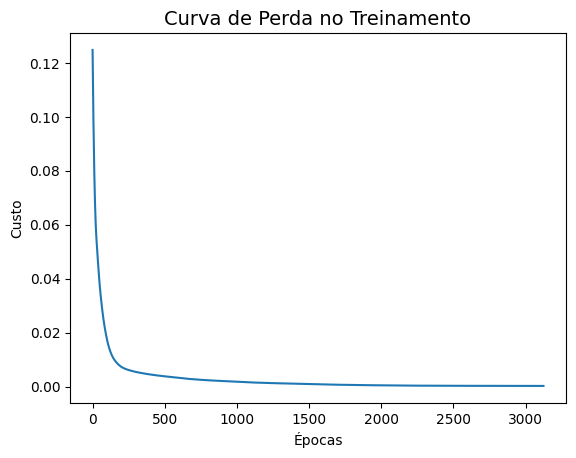

In [ ]:
plt.plot(mlp_reg2.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg2.n_iter_)
print('Loss: ', mlp_reg2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  3125
Loss:  0.00023514551252468572
Mean Absolute Error (MAE):  0.02121298751128465
Mean Squared Error (MSE):  0.0005947815351652067
Root Mean Squared Error (RMSE):  0.0243881433316521
R2 Score:  0.9918313035835903


# **Rede 2: T3**
p = 10,
N1 = 25,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas
print(df.head(15))

dfNew = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-5): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-5': [dados[i]], 'x-4': [dados[i+1]], 'x-3': [dados[i+2]], 'x-2': [dados[i+3]],
                             'x-1': [dados[i+4]], 'x': [dados[i+5]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

    Amostra    f(t)
0         1  0.1701
1         2  0.1023
2         3  0.4405
3         4  0.3609
4         5  0.7192
5         6  0.2258
6         7  0.3175
7         8  0.0127
8         9  0.4290
9        10  0.0544
10       11  0.8000
11       12  0.0450
12       13  0.4268
13       14  0.0112
14       15  0.3218


<ipython-input-44-180b321f6110>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg3 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg3.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[0.67510795 0.03178651 0.68602419 0.30179358 0.62496125 0.41941369
 0.58836912 0.10516276 0.48766521 0.30562326 0.57722558 0.52963374
 0.35979543 0.26479957 0.22161274 0.41773372 0.44088638 0.62789026
 0.29037929 0.5366211 ]


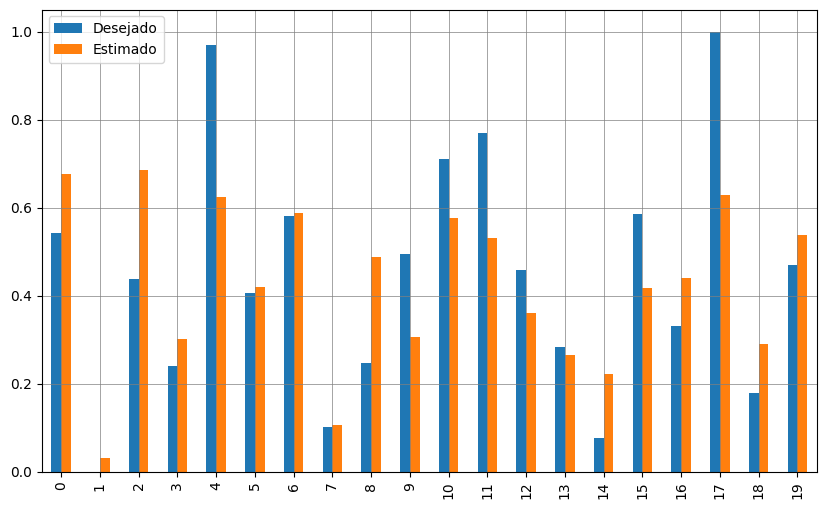

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg3.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

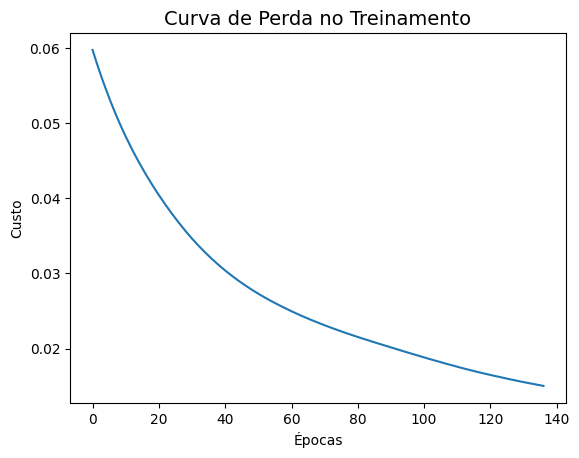

In [ ]:
plt.plot(mlp_reg3.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg3.n_iter_)
print('Loss: ', mlp_reg3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  137
Loss:  0.015044747321617211
Mean Absolute Error (MAE):  0.1368790940174655
Mean Squared Error (MSE):  0.029969893970308137
Root Mean Squared Error (RMSE):  0.17311815032026
R2 Score:  0.5883951484683598


# **Rede 3: T1**
p = 15,
N1 = 50,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11', 'x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-15): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-15': [dados[i]], 'x-14': [dados[i+1]], 'x-13': [dados[i+2]], 'x-12': [dados[i+3]],
                             'x-11': [dados[i+4]], 'x-10': [dados[i+5]], 'x-9': [dados[i+6]], 'x-8': [dados[i+7]],
                             'x-7': [dados[i+8]], 'x-6': [dados[i+9]], 'x-5': [dados[i+10]], 'x-4': [dados[i+11]],
                             'x-3': [dados[i+12]], 'x-2': [dados[i+13]], 'x-1': [dados[i+14]], 'x': [dados[i+15]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-50-e93a0b712507>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg1 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg1.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.63039113 -0.05360123  0.45822756  0.20705132  0.94314969  0.26639758
  0.51461316  0.18887528  0.23095099  0.50191256  0.56934609  0.72153646
  0.39019249  0.30955698  0.10843649  0.5437937   0.35424701  0.95019181
  0.16883911  0.48284847]


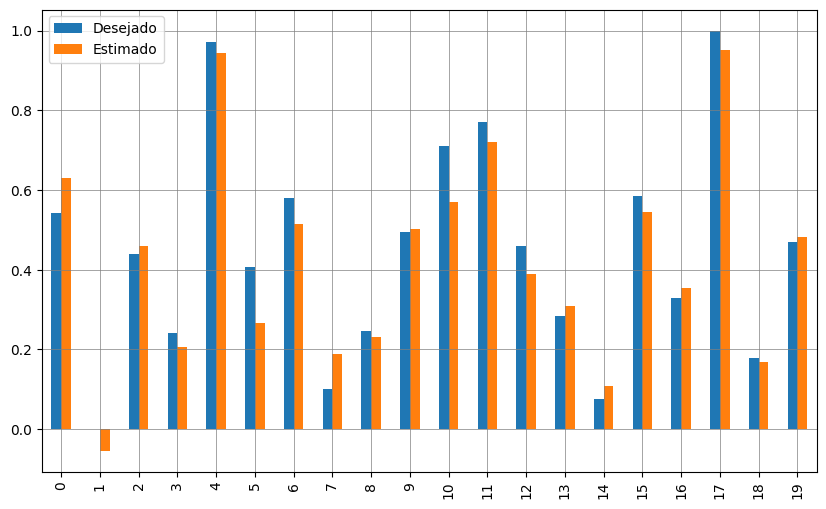

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg1.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

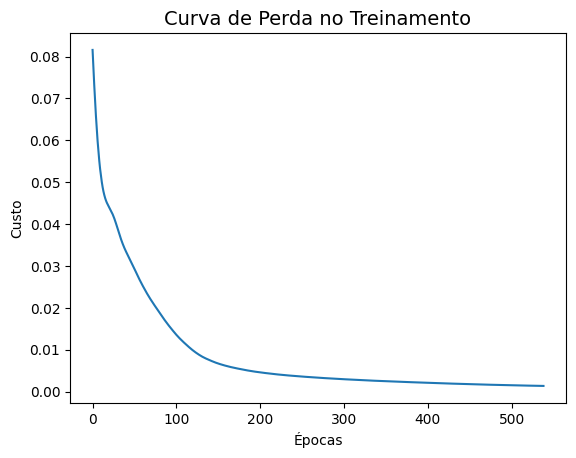

In [ ]:
plt.plot(mlp_reg1.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg1.n_iter_)
print('Loss: ', mlp_reg1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  539
Loss:  0.0013622714615401047
Mean Absolute Error (MAE):  0.049563457333408695
Mean Squared Error (MSE):  0.0038973741220819174
Root Mean Squared Error (RMSE):  0.06242895259478504
R2 Score:  0.9464736812725437


# **Rede 3: T2**
p = 15,
N1 = 50,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11', 'x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-15): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-15': [dados[i]], 'x-14': [dados[i+1]], 'x-13': [dados[i+2]], 'x-12': [dados[i+3]],
                             'x-11': [dados[i+4]], 'x-10': [dados[i+5]], 'x-9': [dados[i+6]], 'x-8': [dados[i+7]],
                             'x-7': [dados[i+8]], 'x-6': [dados[i+9]], 'x-5': [dados[i+10]], 'x-4': [dados[i+11]],
                             'x-3': [dados[i+12]], 'x-2': [dados[i+13]], 'x-1': [dados[i+14]], 'x': [dados[i+15]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-56-e93a0b712507>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg2 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg2.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.38085571  0.21591374  0.30917563 -0.06011946  0.92916525  0.06498578
  0.64615405  0.13403336  0.27448108  0.0273517   0.53131259  0.36082042
  0.5264393   0.27416199  0.26171666  0.27887081  0.17783172  0.65350747
  0.43141022  0.31998176]


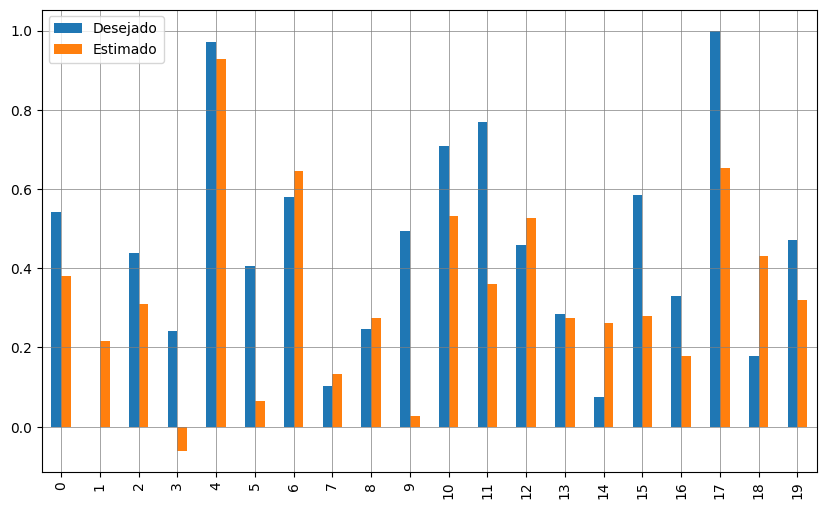

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg2.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

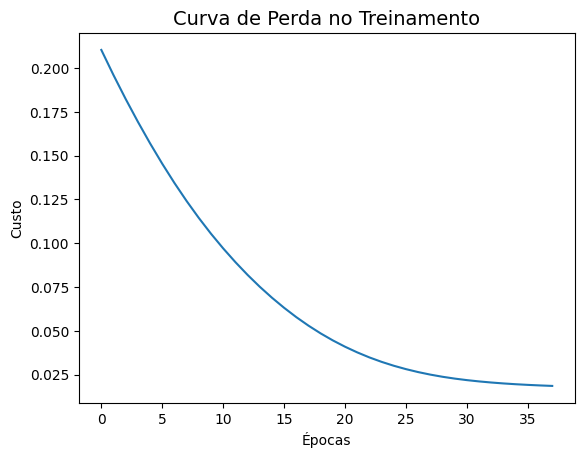

In [ ]:
plt.plot(mlp_reg2.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg2.n_iter_)
print('Loss: ', mlp_reg2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  38
Loss:  0.01855009368672694
Mean Absolute Error (MAE):  0.19207277398879152
Mean Squared Error (MSE):  0.05420477444782612
Root Mean Squared Error (RMSE):  0.23281918831536658
R2 Score:  0.2555546522451002


# **Rede 3: T3**
p = 15,
N1 = 50,
solver='adam'

Carregamento e Organização Inicial do Dataset

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/variacaoValores.csv") # Carregamento do dataset via Pandas

dfNew = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11', 'x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-15): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-15': [dados[i]], 'x-14': [dados[i+1]], 'x-13': [dados[i+2]], 'x-12': [dados[i+3]],
                             'x-11': [dados[i+4]], 'x-10': [dados[i+5]], 'x-9': [dados[i+6]], 'x-8': [dados[i+7]],
                             'x-7': [dados[i+8]], 'x-6': [dados[i+9]], 'x-5': [dados[i+10]], 'x-4': [dados[i+11]],
                             'x-3': [dados[i+12]], 'x-2': [dados[i+13]], 'x-1': [dados[i+14]], 'x': [dados[i+15]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y_train = dfNew[['x']][:-20] # Inclusão da variável x no vetor de saídas desejadas
x_train = dfNew.drop('x', axis=1)[:-20] # Exclusão da variável x das entradas
y_test = dfNew[['x']][-20:] # Inclusão da variável x no vetor de saídas desejadas
x_test = dfNew.drop('x', axis=1)[-20:] # Exclusão da variável x das entradas

<ipython-input-62-e93a0b712507>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)


Pré-Processamento dos Dados

In [ ]:
scaler = MinMaxScaler()
trainX = scaler.fit_transform(x_train)
trainY = scaler.fit_transform(y_train)
testX = scaler.fit_transform(x_test)
testY = scaler.fit_transform(y_test)

testY = testY.ravel()

Aplicação do MLPRegressor

In [ ]:
mlp_reg3 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', alpha = 0.0001,
                       max_iter=5000, tol=0.000001, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg3.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

Avaliação do Modelo

[ 0.45905977 -0.1273665   0.41606321  0.14431204  1.00647957  0.23720814
  0.52723207  0.12290944  0.252211    0.45742008  0.49042932  0.65857777
  0.3911775   0.29034075  0.09999977  0.53643058  0.29116325  0.98159809
  0.23311623  0.4432127 ]


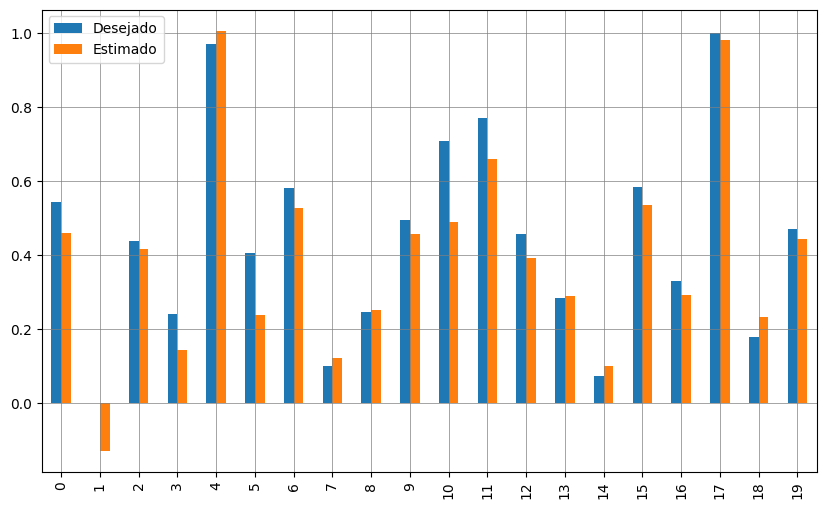

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg3.predict(testX)
print(y_pred)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

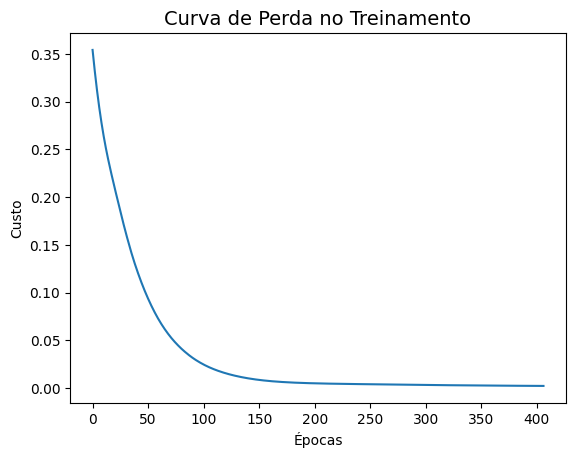

In [ ]:
plt.plot(mlp_reg3.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Epochs: ', mlp_reg3.n_iter_)
print('Loss: ', mlp_reg3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  407
Loss:  0.002366898671672774
Mean Absolute Error (MAE):  0.06343617058519815
Mean Squared Error (MSE):  0.007040614066403714
Root Mean Squared Error (RMSE):  0.08390836708221483
R2 Score:  0.9033045992633559
